In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from sklearn import metrics

In [3]:
bank_df = pd.read_csv('./data/bank.csv')
bank_df.head()

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no


In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                4521 non-null   int64 
 1   job                4521 non-null   object
 2   marital            4521 non-null   object
 3   education          4521 non-null   object
 4   default            4521 non-null   object
 5   balance            4521 non-null   int64 
 6   housing-loan       4521 non-null   object
 7   personal-loan      4521 non-null   object
 8   current-campaign   4521 non-null   int64 
 9   previous-campaign  4521 non-null   int64 
 10  subscribed         4521 non-null   object
dtypes: int64(4), object(7)
memory usage: 388.7+ KB


In [5]:
bank_df.subscribed.value_counts()

subscribed
no     4000
yes     521
Name: count, dtype: int64

In [6]:
campaign = bank_df.subscribed.value_counts().to_frame().rename(columns={'subscribed':'absolute'})
campaign["percent"] = campaign.apply(lambda x: x/x.sum()*100).round(2)
display(campaign)

,count,percent
subscribed,,
no,4000,88.48
yes,521,11.52


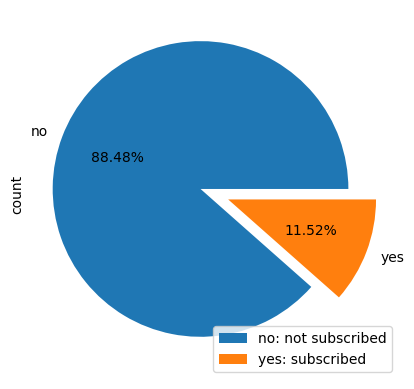

In [15]:
d=bank_df.subscribed.value_counts()
d.plot(kind='pie', subplots=True, autopct='%1.2f%%', explode=(0.1, 0.1))
plt.legend(['no: not subscribed','yes: subscribed'])

In [21]:
from sklearn.utils import resample

df_subscribed = bank_df[bank_df.subscribed == 'yes']
df_unsubscribed = bank_df[bank_df.subscribed == 'no']

df_new_subscribed = resample(df_subscribed, replace=True, n_samples=3000)

df_bank_new = pd.concat([df_unsubscribed, df_new_subscribed], axis='index')

df_bank_new.head()

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no


In [22]:
df_bank_new.shape

(7000, 11)

In [24]:
def print_unique_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column} : {df[column].unique()}')

In [53]:
print_unique_values(df_bank_new)

job : ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'housemaid' 'retired' 'student']


In [26]:
yes_no_columns = ['subscribed','personal-loan','housing-loan','default']

In [28]:
for col in yes_no_columns:
    df_bank_new[col].replace({'yes':1, 'no':0}, inplace=True)

In [31]:
df_bank_new.marital.replace({'married':1, 'single': 2, 'divorced':3}, inplace=True)

In [40]:
df_bank_new.education.replace('unknown', np.nan, inplace=True)

In [47]:
df_bank_new.education.ffill(inplace=True)

In [49]:
df_bank_new.education.replace({'primary': 1, 'secondary': 2, 'tertiary':3}, inplace=True)

In [51]:
df_bank_new.job.replace('unknown',np.nan, inplace=True)

In [52]:
df_bank_new.job.ffill(inplace=True)

In [54]:
df_bank_new.job.replace('admin.','admin', inplace=True)

In [55]:
df_bank_new = pd.get_dummies(data=df_bank_new, columns=['job', 'education', 'marital'], dtype=int)

In [56]:
df_bank_new.head()

,age,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed,job_admin,job_blue-collar,...,job_services,job_student,job_technician,job_unemployed,education_1,education_2,education_3,marital_1,marital_2,marital_3
0,30,0,1787,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
1,33,0,4789,1,1,1,4,0,0,0,...,1,0,0,0,0,1,0,1,0,0
2,35,0,1350,1,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,30,0,1476,1,1,4,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,59,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0


In [58]:
from sklearn.model_selection import train_test_split
X = df_bank_new.drop(['subscribed'], axis='columns')
y = df_bank_new['subscribed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=50)

In [61]:
X_test.shape

(1400, 24)

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

model = Pipeline([('scaler', StandardScaler()), ('randforest',RandomForestClassifier(n_estimators=50))])
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('randforest', RandomForestClassifier(n_estimators=50))])

In [63]:
model.score(X_test, y_test)

0.9542857142857143

In [64]:
y_pred = model.predict(X_test)

<Axes: >

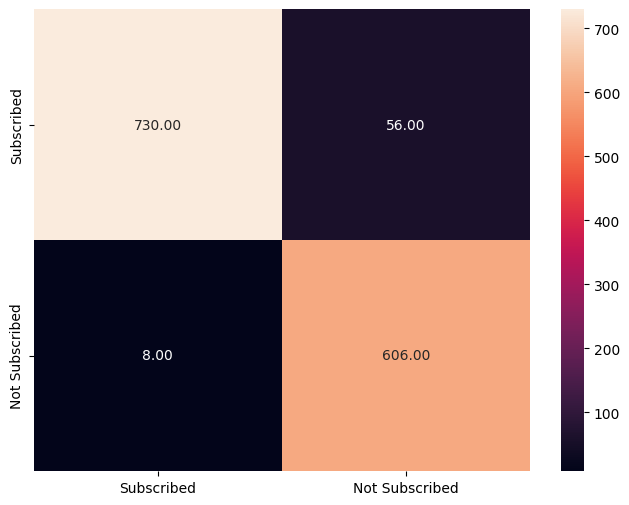

In [72]:
cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sn.heatmap(cm, annot=True, fmt='.2f', xticklabels = ["Subscribed", "Not Subscribed"], yticklabels = ["Subscribed", "Not Subscribed"])


In [116]:
d=model.predict_proba(X_test)
d1=d[:,1:2]
d1.ravel()

array([1.  , 0.98, 1.  , ..., 0.02, 0.2 , 0.1 ])

In [90]:
y_pred_proba = pd.DataFrame(model.predict_proba(X_test))
#y_pred_proba.head()
y_pred_proba.iloc[:,1:2].values

array([[1.  ],
       [0.98],
       [1.  ],
       ...,
       [0.02],
       [0.2 ],
       [0.1 ]])

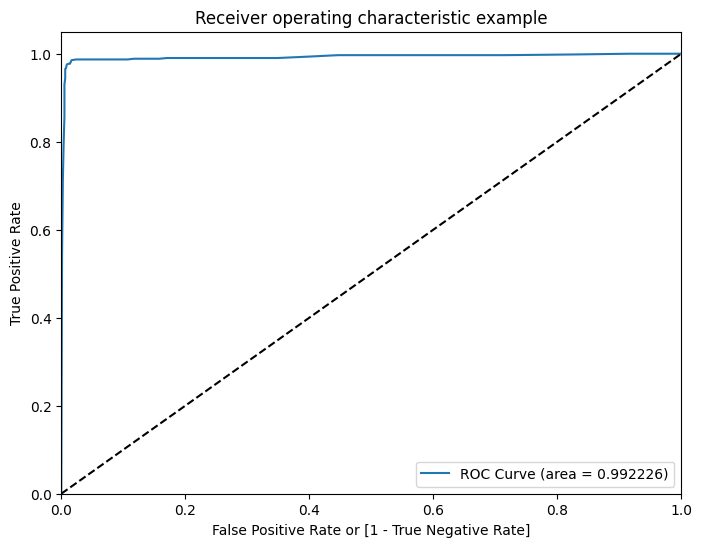

In [117]:
y_prob=model.predict_proba(X_test)[:,1:2]

fpr, tpr, threshholds = metrics.roc_curve(y_test, y_prob, drop_intermediate=False)
auc_score = metrics.roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %2f)' % auc_score)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]') 
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example') 
plt.legend(loc="lower right")
plt.show()

In [119]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'max_depth':[10, 15], 'n_estimators': [40, 50, 60], 'max_features': ['sqrt','auto']}]
#model1 = Pipeline([('scaler', StandardScaler()), ('randforest',RandomForestClassifier())])

rand_clf = RandomForestClassifier()
clf = GridSearchCV(rand_clf, tuned_parameters, cv=5, scoring='roc_auc')

clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 15],
                          'max_features': ['sqrt', 'auto'],
                          'n_estimators': [40, 50, 60]}],
             scoring='roc_auc')

In [120]:
clf.best_score_

0.9745317295409095

In [121]:
clf.best_params_

{'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 60}

In [123]:
rand_clf = RandomForestClassifier(n_estimators=10, max_depth=15, max_features='sqrt')
rand_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=10)

In [124]:
rand_clf.score(X_test, y_test)

0.9257142857142857

<Axes: xlabel='importance', ylabel='feature'>

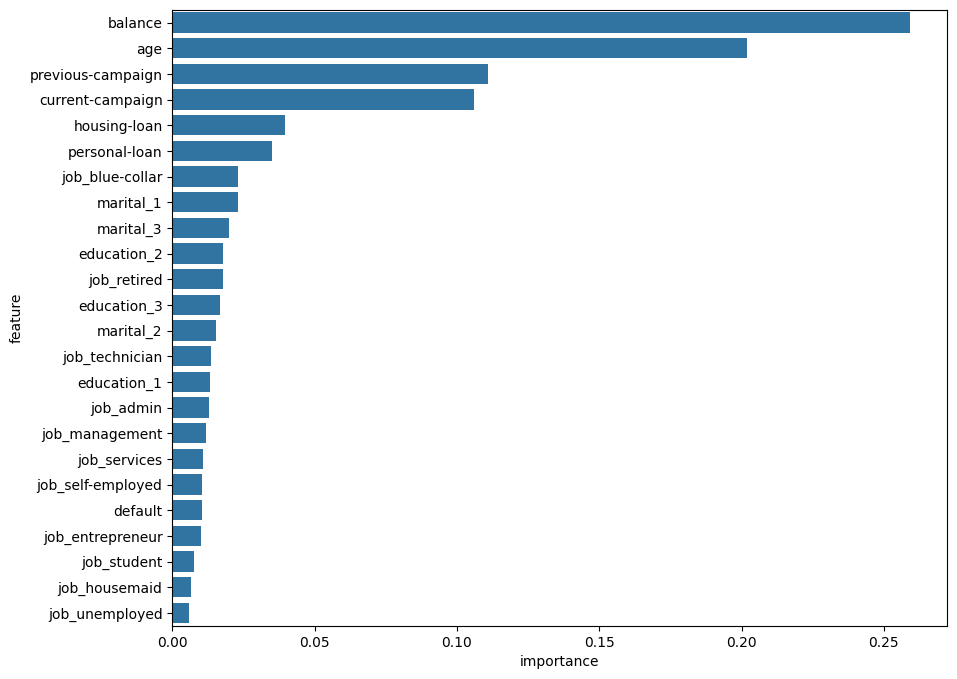

In [127]:
feature_rank = pd.DataFrame({'feature': X_train.columns, 'importance': rand_clf.feature_importances_ })
feature_rank = feature_rank.sort_values('importance', ascending=False)

plt.figure(figsize=(10,8))
sn.barplot(y='feature', x='importance', data=feature_rank)
